In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


DADOS = '..\dados\Mall_customers_sem_CustumerID.csv'
df_clustered = pd.read_csv(DADOS)

df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [2]:
RANDOM_STATE = 42
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder ,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
preprocessing = ColumnTransformer([
    ('standard',StandardScaler(),['Age','Annual Income (k$)','Spending Score (1-100)']),
    ('onehot',OneHotEncoder(),['Gender'])
]) 

In [4]:
pipe = Pipeline([
    ('preprocessing',preprocessing),
    ('pca',PCA(n_components=3,random_state=RANDOM_STATE)),
    ('clustering',KMeans(n_clusters=5,random_state=RANDOM_STATE))

])

pipe.fit(df_clustered)

  File "c:\Users\thiago.ramalho\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('pca', PCA(n_components=3, random_state=42)),
                ('clustering', KMeans(n_clusters=5, random_state=42))])

In [5]:
import joblib
joblib.dump(pipe,'../modelos/pipeline_preprocessing_pca_clustered.pkl')

['../modelos/pipeline_preprocessing_pca_clustered.pkl']

In [6]:
pipe.get_feature_names_out()

array(['kmeans0', 'kmeans1', 'kmeans2', 'kmeans3', 'kmeans4'],
      dtype=object)

In [7]:
pipe['clustering'].labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 0, 3, 1, 3,
       0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 1,
       0, 3, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 4, 1, 4, 2, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [8]:
df_clustered['Cluster'] = pipe['clustering'].labels_

In [9]:
df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,1
1,Male,21,15,81,3
2,Female,20,16,6,1
3,Female,23,16,77,3
4,Female,31,17,40,1


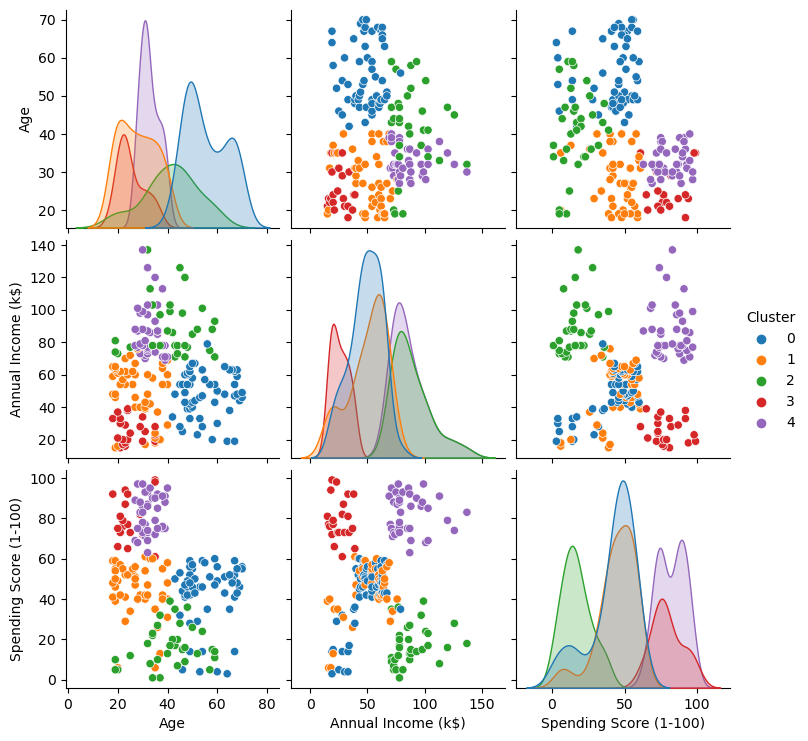

In [10]:
sns.pairplot(df_clustered,hue='Cluster',palette='tab10');

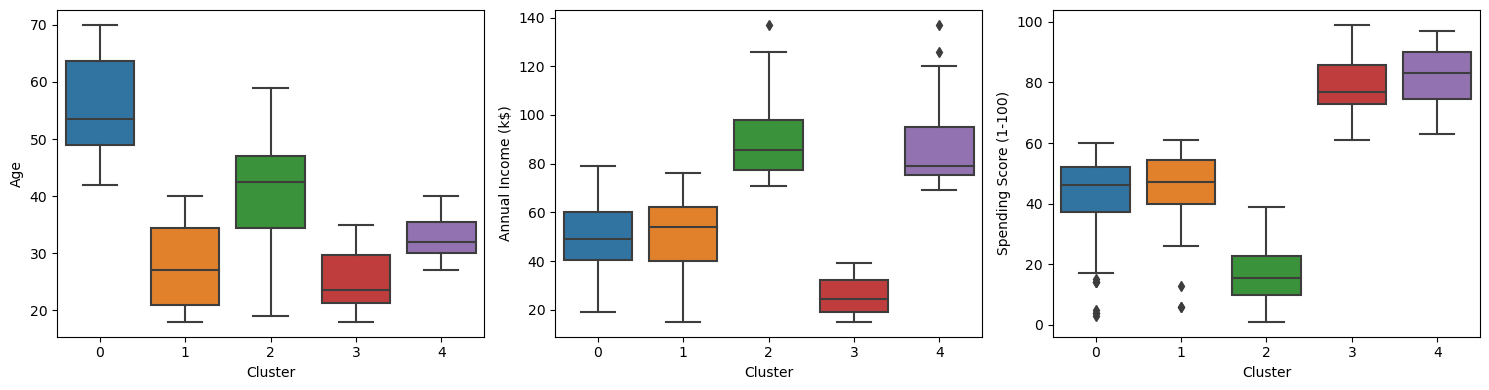

In [11]:
fif , axs = plt.subplots(nrows=1 , ncols=3,figsize =(15,4),tight_layout =True)
X = df_clustered.drop('Gender',axis=1)
for ax , col in zip(axs,X):
    sns.boxplot(data = df_clustered , x ="Cluster" , y =col ,ax = ax )

In [12]:
df_clustered.Cluster.value_counts().sort_index()

Cluster
0    58
1    47
2    34
3    22
4    39
Name: count, dtype: int64

In [13]:
pipe['pca'].components_

array([[ 0.70508424, -0.03921531, -0.70473508, -0.04830549,  0.04830549],
       [ 0.02024387,  0.996115  , -0.02730038, -0.05744471,  0.05744471],
       [-0.70661643, -0.00434967, -0.70753413,  0.00590595, -0.00590595]])

In [14]:
pipe['clustering'].cluster_centers_

array([[ 1.09281997, -0.42702742, -0.61346816],
       [-0.39283157, -0.42287385,  0.70807382],
       [ 1.00944112,  1.11828568,  0.78954352],
       [-1.4357643 , -1.37856558, -0.10638215],
       [-1.2219143 ,  0.94742028, -0.56929202]])

In [15]:
pipe['pca'].components_.max(axis = 1)

array([0.70508424, 0.996115  , 0.00590595])

In [16]:
df_pca = pd.DataFrame(
    pipe[:-1].fit_transform(df_clustered.drop('Cluster',axis =1)),
    columns = pipe[:-1].get_feature_names_out()


)

In [17]:
df_pca.head()

,pca0,pca1,pca2
0,-0.575724,-1.684874,1.315210
1,-1.623595,-1.726481,0.060149
2,0.279614,-1.725314,2.182574
3,-1.511064,-1.796205,0.080242
4,-0.095468,-1.707347,0.690684


In [18]:
centroids = pipe['clustering'].cluster_centers_

In [19]:
from funcoes_auxiliares import visualizar_cluster

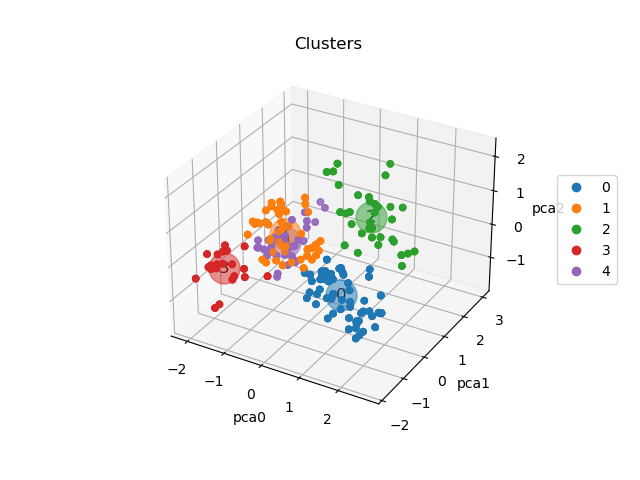

In [22]:
%matplotlib  ipympl
visualizar_cluster(df=df_pca,
                    colunas = ['pca0','pca1','pca2'],
                    qde_cores=5,
                    centroid_pipe=centroids,
                    coluna_cluster =df_clustered['Cluster'],
                
                    )

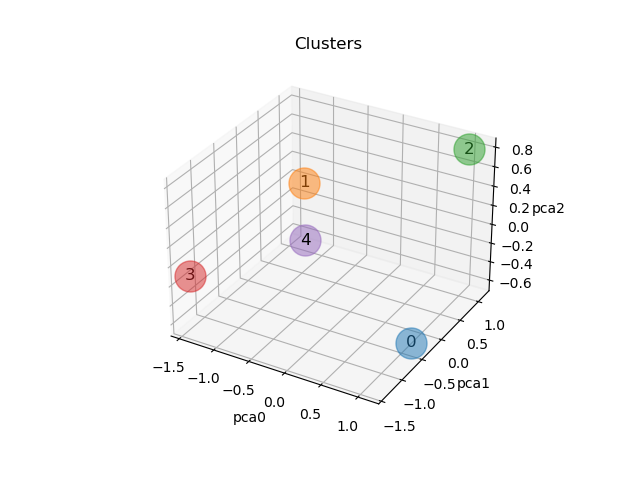

In [20]:
%matplotlib  ipympl
visualizar_cluster(df=df_pca,
                    colunas = ['pca0','pca1','pca2'],
                    qde_cores=5,
                    centroid_pipe=centroids,
                    coluna_cluster =df_clustered['Cluster'],
                    centroid =True,
                    pontos = False
                    )